In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
data = '../../data/raw'
%matplotlib inline

In [2]:
train = pd.read_csv('../../data/raw/train.csv')
depths = pd.read_csv('../../data/raw/depths.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BBB09D898>]],
      dtype=object)

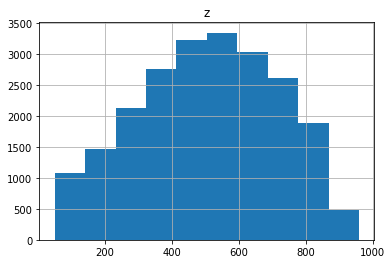

In [3]:
depths.hist()

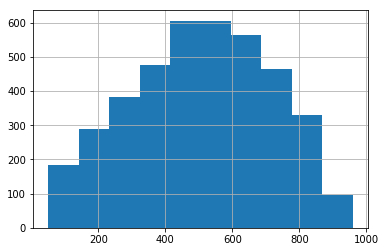

In [4]:
# depths['z'].value_counts()
pd.concat([depths,train],axis=1,join='inner')['z'].hist()

In [98]:
x=1670
img = cv2.imread(data+'/train/images/'+train.iloc[x][0]+'.png')
out = cv2.imread(data+'/train/masks/'+train.iloc[x][0]+'.png')

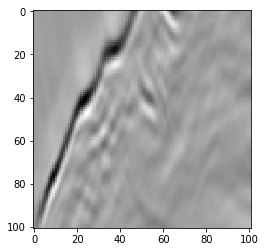

In [99]:
plt.imshow(img)

[[ 0.    -0.125 -0.125 -0.125]
 [ 0.125  0.     0.     0.   ]
 [ 0.125  0.     0.125  0.   ]
 [ 0.     0.125  0.     0.125]]


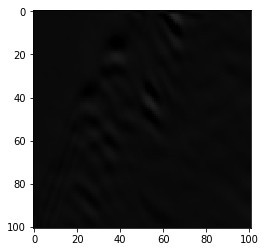

In [100]:
kernel = np.array([(0,-1,-1,-1),(1,0,0,0),(1,0,1,0),(0,1,0,1)])/8
print(kernel)
dst = cv2.filter2D(img,-1,kernel)
for i in range(1):
    dst = cv2.filter2D(dst,-1,kernel)
plt.imshow(dst)

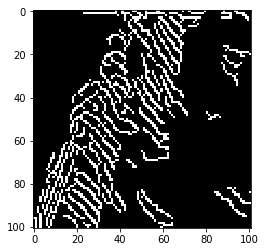

In [105]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sigma=0.33
v = np.median(dst)

#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(dst, lower, upper)
# edged = cv2.dilate(edged,iteration =5)
plt.imshow(edged,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


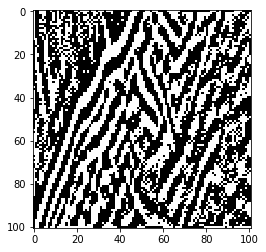

In [102]:
plt.imshow(cv2.Laplacian(img, cv2.CV_64F),cmap='gray')

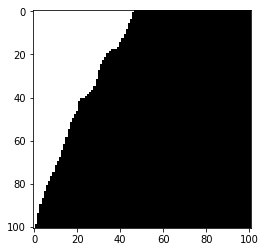

In [103]:
plt.imshow(out)

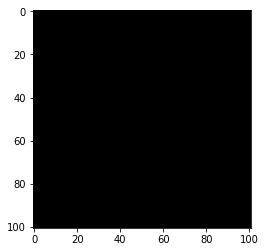

In [156]:
kernel = np.ones((5,5),np.uint8)
# erosion = cv2.dilate(edges,kernel,iterations = 1)
erosion = cv2.erode(edges,kernel,iterations = 1)

plt.imshow(erosion)

In [124]:
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
gradient=cv2.morphologyEx(edges,cv2.MORPH_GRADIENT,elKernel)
gradient = cv2.cvtColor(gradient,cv2.COLOR_BGR2GRAY)
# plt.imshow(gradient)
otsu=cv2.threshold(edges,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
plt.imshow(otsu)

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1406: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::threshold'


In [61]:
import time

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
 
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)


In [17]:
img = np.random.choice([0,1],size = (100,100))

In [20]:
rle_decode(rle_encode(img),(100,100))

array([[0, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 1]], dtype=uint8)

In [2]:
import torch

ModuleNotFoundError: No module named 'torch'